In [1]:
import xarray
import matplotlib.pyplot as mp
import cartopy
import numpy
import glob
import gdal
import matplotlib.colors
import matplotlib.cm

In [157]:
step = 1e-4
one = numpy.arange(1e-4,1e-3,step)

step = 5e-4
two = numpy.arange(1e-3,8.5e-3,step)

step = 1e-2
three = numpy.arange(1e-2,1.1e-1+step,step)

bounds = list(numpy.concatenate((one,two,three)))

In [171]:
rgb_colors = numpy.array(( \
35,61,153, \
62,119,185, \
67,161,217, \
65,200,240, \
108,202,220, \
109,199,182, \
110,195,146, \
12,128,128, \
25,170,86, \
242,234,26, \
241,235,26, \
250,212,4, \
250,168,25, \
244,127,31, \
240,85,36, \
235,32,35, \
237,47,90, \
238,84,126, \
241,127,169, \
71,71,71, \
100,102,101, \
130,132,131, \
154,154,154, \
180,180,180, \
199,199,199, \
224,225,227, \
236,236,238, \
242,242,244, \
244,245,247, \
245,246,248, \
250,252,251 ), dtype=numpy.float)

rgb_colors = rgb_colors.reshape((-1,3))
rgb_colors /= 256.

over_under_bad_colors = numpy.array(( \
[0,42,127], \
[255,255,255], \
[0,42,127]), dtype=numpy.float)
over_under_bad_colors /= 256.

calipso_colormap = matplotlib.colors.ListedColormap(rgb_colors, 'calipso_cmap')

calipso_colormap.set_under(over_under_bad_colors[0,:])
calipso_colormap.set_over(over_under_bad_colors[1,:])
calipso_colormap.set_bad(over_under_bad_colors[2,:])

In [172]:
#file_dir = '/Users/baird/Dropbox/_data_observations/CALIPSO/'
file_dir = '/beegfs/DATA/pritchard/blangenb/CALIPSO_DATA/'

file_list = sorted(glob.glob(file_dir+'/*.hdf'))

# change file number here

In [194]:
# ===== open file, pull out specific data set

file = file_list[-1]

gdal_file = gdal.Open(file)
gdal_subdatasets = gdal_file.GetSubDatasets()
gdal_clf_ds = gdal.Open(gdal_subdatasets[31][0]) # cloud fraction
gdal_tbc_ds = gdal.Open(gdal_subdatasets[35][0]) # total backscatter

gdal_clf_data = gdal_clf_ds.ReadAsArray()
gdal_tbc_data = gdal_tbc_ds.ReadAsArray()

ds = xarray.open_dataset(file)

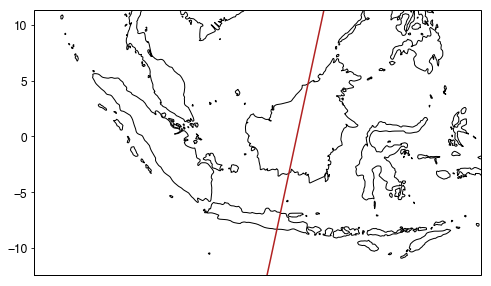

In [195]:
lat = ds['Latitude'].sel(fakeDim3=0).values
lon = ds['Longitude'].sel(fakeDim5=0).values


#####
fontsize=12
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection=map_proj)
ax.set_extent([90,130,-12,11])
#ax.set_extent([50,180,-70,70])
ax.coastlines(resolution='50m')

ax.plot(lon,lat,c='firebrick')

ax.set_yticks([-10,-5,0,5,10])
ax.tick_params(labelsize=fontsize)

In [196]:
surface_elevation = ds['Surface_Elevation_Statistics'].values
ds['Surface_Elevation_Statistics']

<xarray.DataArray 'Surface_Elevation_Statistics' (fakeDim54: 3744, fakeDim55: 4)>
array([[0.923   , 1.022   , 0.986333, 0.029293],
       [0.971   , 1.125   , 1.0682  , 0.053733],
       [0.982   , 1.074   , 1.0304  , 0.025703],
       ...,
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.      ]], dtype=float32)
Dimensions without coordinates: fakeDim54, fakeDim55
Attributes:
    units:        kilometers
    format:       Float_32
    valid_range:  -1.0...9.0
    fillvalue:    -9999.0

    30 km to -0.5

    20km to -0.5 km:  60m vertical resolution
    >20km:  180m

In [197]:
altitude_values =  numpy.arange

In [198]:
ds

<xarray.Dataset>
Dimensions:                                                       (fakeDim0: 3744, fakeDim1: 2, fakeDim10: 3744, fakeDim100: 1, fakeDim101: 3744, fakeDim102: 1, fakeDim103: 3744, fakeDim104: 1, fakeDim105: 3744, fakeDim106: 1, fakeDim107: 3744, fakeDim108: 1, fakeDim109: 3744, fakeDim11: 1, fakeDim110: 1, fakeDim111: 3744, fakeDim112: 1, fakeDim113: 3744, fakeDim114: 1, fakeDim115: 3744, fakeDim116: 1, fakeDim117: 3744, fakeDim118: 1, fakeDim119: 3744, fakeDim12: 3744, fakeDim120: 1, fakeDim121: 3744, fakeDim122: 1, fakeDim123: 3744, fakeDim124: 1, fakeDim125: 3744, fakeDim126: 1, fakeDim127: 3744, fakeDim128: 1, fakeDim129: 3744, fakeDim13: 1, fakeDim130: 1, fakeDim131: 3744, fakeDim132: 1, fakeDim133: 3744, fakeDim134: 1, fakeDim135: 3744, fakeDim136: 1, fakeDim137: 3744, fakeDim138: 1, fakeDim139: 3744, fakeDim14: 3744, fakeDim140: 1, fakeDim141: 3744, fakeDim142: 1, fakeDim15: 1, fakeDim16: 3744, fakeDim17: 1, fakeDim18: 3744, fakeDim19: 1, fakeDim2: 3744, fakeDim2

### trying to create cmap from these values

In [199]:
norm = matplotlib.colors.BoundaryNorm(bounds, calipso_colormap.N)

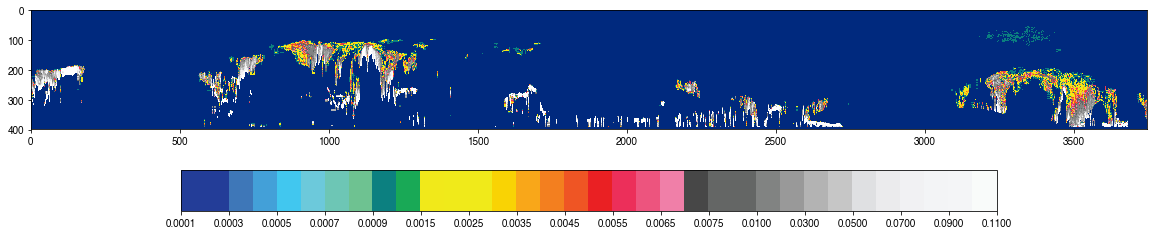

In [200]:
fig = mp.figure(figsize=(20,5))
ax = fig.add_subplot(111)
#plot = ax.pcolormesh(gdal_tbc_data.T[::-1,:], norm=norm, vmin=0, vmax=0.1, cmap=calipso_colormap)
plot = ax.imshow(gdal_tbc_data.T, norm=norm, cmap=calipso_colormap)

cbar = mp.colorbar(plot, norm=norm, orientation='horizontal')
cbar.set_ticks(bounds[::2])